# Program_5.ipynb: Python for A-Level Mathematics (Part 2)

# Introduction

This notebook lists examples of simple Python commands and programs that can be used to help with the understanding of the new A-Level syllabus. Teachers can use the examples to help with teaching or to make up examples and exercises. Pupils can use Python to check their answers and learn programming to help with employability. As you will discover, Python can help with all of the MEI schemes of work listed in the table above. 

This is a Jupyter notebook launched from within the Anaconda data science platform. Anaconda can be downloaded here:

https://www.anaconda.com

Python is an open-source programming language used extensively around the world. It is also vital for carrying out Scientific Computation!

To execute commands in Jupyter, either Run the cell or hit SHIFT + ENTER.

More information on why you should learn Python is given here: <a href="https://www.mathscareers.org.uk/python-for-a-level-maths-undergraduate-maths-and-employability/" title="IMA Article">Python for A-Level Maths, Undergraduate Maths and Employability</a>

Alternatively, you can perform cloud computing using Google Colab:

https://colab.research.google.com/

You will need a Google account to perform cloud computing.

# 33. Differential Equations

(i) Plot the solution to the initial value problem, $\frac{dP}{dt}=P(1-0.01P)$, given that $P(0)=400$. This is a simple population model.

P(t) = Eq(P(t), -100.0/(-1.0 + 0.75*exp(-t)))


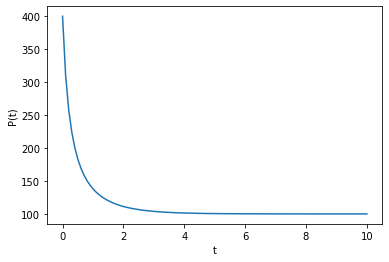

In [ ]:
import numpy as np
from sympy import dsolve, Function, symbols
import matplotlib.pyplot as plt
P = Function('P')
t = symbols('t')
ODE = P(t).diff(t) - P(t) * (1 - 0.01 * P(t))
print('P(t) =', dsolve(ODE, ics = {P(0):400}))
t = np.linspace(0, 10, 100)
# Plot the solution to the ODE, P(t).
plt.plot(t, 100.0/(1.0  - 0.75*np.exp(-t)))
plt.xlabel('t')
plt.ylabel('P(t)')
plt.show()

(ii) A very simple epidemic model is described by the differential equations:

$\frac{dS}{dt}=-\frac{\beta S I}{N}, \quad \frac{dI}{dt}=\frac{\beta S I}{N} -\gamma I, \quad \frac{dR}{dt}=\gamma I,$

where $S(t)$ is the susceptible population, $I(t)$ is the infected population, $R(t)$ is the recovered-immune population, $N$ is the total population, $\beta$ is the contact rate of the disease and $\gamma$ is the mean recovery rate. Plot the solution curves for $S(t), I(t), R(t)$, given that $N=1000$, $S(0)=999$, $I(0)=1$, $R(0)=0$, $\beta=0.5$ and $\gamma=0.1$. This could be a simple model of the spread of flu in a school.

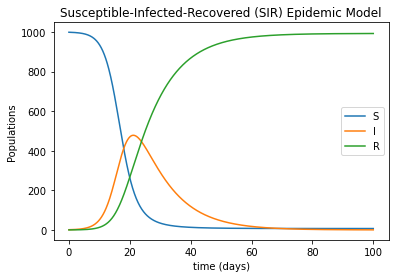

In [ ]:
# SIR Epidemic model.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
# Set the parameters.
beta, gamma = 0.5, 0.1
S0, I0, R0, N = 999, 1, 0, 1000
tmax, n = 100, 1000
def SIR_Model(X, t, beta, gamma):
    S, I, R = X
    dS = - beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return(dS, dI, dR)
t = np.linspace(0, tmax, n)
f = odeint(SIR_Model, (S0, I0, R0), t, args = (beta, gamma))
S, I, R = f.T
plt.figure(1)
plt.xlabel('time (days)')
plt.ylabel('Populations')
plt.title('Susceptible-Infected-Recovered (SIR) Epidemic Model')
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
legend = plt.legend(loc = 'best')
plt.show()

# 34. Numerical Methods

Use the Newton-Raphson method to find the root of $x^3-0.9x^2+2=0$, starting with the point $x_0=2$. Give your answer to four decimal places. Recall that:

$x_{n+1}=x_n-\frac{f\left(x_n\right)}{f'(x_n)}$.

In [ ]:
def fn(x):
    return x**3 - 0.9 * x**2 + 2
def dfn(x):
    return 3 * x**2 - 1.8 * x
def NewtonRaphson(x):
    i = 0
    h = fn(x) / dfn(x)
    while abs(h) >= 0.0001:
        h = fn(x) / dfn(x)
        x = x - h
        i += 1              # i = i + 1
        print('x(', i ,')', 'is {:6.4f}.'.format(x))
# Start at x( 0 ) = 2.
NewtonRaphson(2)

x( 1 ) is 1.2381.
x( 2 ) is 0.1756.
x( 3 ) is 9.0222.
x( 4 ) is 6.1131.
x( 5 ) is 4.1665.
x( 6 ) is 2.8496.
x( 7 ) is 1.9224.
x( 8 ) is 1.1648.
x( 9 ) is -0.0307.
x( 10 ) is -34.4718.
x( 11 ) is -22.8835.
x( 12 ) is -15.1594.
x( 13 ) is -10.0129.
x( 14 ) is -6.5872.
x( 15 ) is -4.3139.
x( 16 ) is -2.8196.
x( 17 ) is -1.8664.
x( 18 ) is -1.3134.
x( 19 ) is -1.0722.
x( 20 ) is -1.0225.
x( 21 ) is -1.0205.
x( 22 ) is -1.0205.


# 35. Probability

Generate some random data in Python and compare the histogram to a normal probability distribution function. Deremine the mean and standard deviation of the data.

Mean = 427.4599332718842
Standard Deviation = 443.7026959303684


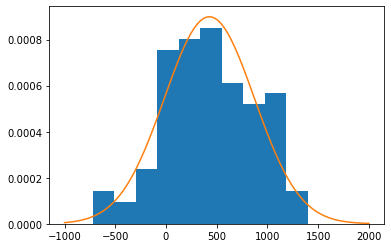

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
data = 50 * np.random.rand() * np.random.normal(10, 10, 100) + 20
plt.hist(data, density = True)
xt = plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(data))
m, s = stats.norm.fit(data)
pdf_g = stats.norm.pdf(lnspc, m, s)
plt.plot(lnspc, pdf_g)
print('Mean =', m)
print('Standard Deviation =', s)
plt.show()

# 36. Probablility Distributions

The normal probability density function (PDF) is an example of a continuous PDF.

The general form of a normal distribution is:

$f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma} \right)^2    }$, 

where $\mu$ is the mean or expectation of the distribution, $\sigma^2$, is the variance, amd $\sigma$ is the standard deviation.

Example: Suppose that $X$ is normally distributed with a mean of 80 and a standard deviation of 4. So, $X \sim N(80, 16)$. Plot the bell curve and determine:

(a) $P(X<75)$;
(b) $P(X>83)$;
(c) $P(72<X<76)$.

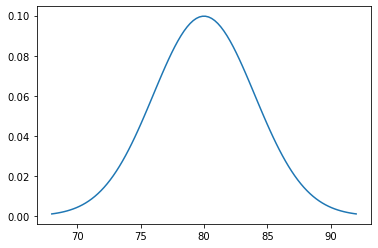

P(X<75)= 0.10564977366685535
P(X>83)= 0.22662735237686826
P(72<X<76)= 0.13590512198327787


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu , variance = 80 , 4**2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

sola = stats.norm.cdf(75, loc=mu, scale=sigma)
print('P(X<75)=', sola)

solb = 1 - stats.norm.cdf(83, loc=mu, scale=sigma)
print('P(X>83)=', solb)

solc = stats.norm.cdf(76, loc=mu, scale=sigma) - \
       stats.norm.cdf(72, loc=mu, scale=sigma)
print('P(72<X<76)=', solc)


# 37. Hypothesis Testing

Example: The diameters of circular cardboard drinks packs produced by a certain machine are normally distributed with a mean of 9cm and standard deviation of 0.15cm. After the machine is serviced a random sample of 30 mats is selected and their diameters are measured to see if the mean diameter has altered.

The mean of the sample was 8.95cm. Test at the 5% level, whether there is significant evidence of a change in the mean diameter of mats produced by the machine.

Now, the null hypothesis is, $H_0: \mu=9$,

The alternative hypothesis is, $H_1: \mu \neq 9$. (Two-tailed test)

See below. Since $P(X<=8.95)=0.033945<0.025$, accept $H_0$.

There is not enough evidence to suggest there has been a change in the mean diamater of the mats.

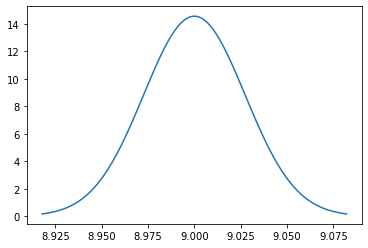

P(X<=8.95)= 0.033944577430912545


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu , variance = 9 , 0.15**2 / 30
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

sol = stats.norm.cdf(8.95, loc=mu, scale=sigma)
print('P(X<=8.95)=', sol)

# 38. Kinematics

Given that, $\underline{u}=2\underline{i}+9\underline{j} \, ms^{-1}$, $\underline{a}=-9.8\underline{j} \, ms^{-2}$, and $t=0.2s$, show 
that the distance travelled is $\underline{s}=0.4\underline{i}+1.604\underline{j} \, m$. 

Recall that:

$\underline{v}=\underline{u}+\underline{a}t$;

$\underline{v}^2=\underline{u}^2+2\underline{a}\, \underline{s}$;

$\underline{s}=\underline{u}t+\frac{1}{2}\underline{a}t^2$;

$\underline{s}=(\underline{u}+\underline{v}) \frac{t}{2}$.


In [ ]:
import numpy as np
u = np.array([2, 9])
a = np.array([0, -9.8])
t = 0.2
s = u * t + a * t**2 / 2
print('Distance travelled =', s, 'm')

Distance travelled = [0.4   1.604] m


# 39. Forces and Motion

Determine the resultant force given, $\underline{F_A}=-20 \underline{j}$ N and $\underline{F_B}=-16\underline{i}-16\underline{j}$ N. 

In [ ]:
import numpy as np
FAx = 0
FAy = -20
FBx = -16 * np.sin(np.radians(40.8))
FBy = -16 * np.cos(np.radians(40.8))
FR = np.array([FAx + FBx, FAy + FBy])
FR_norm = np.linalg.norm(FR)
FR_angle = np.degrees(np.arctan(FR[1] / FR[0]))
print("FR =", FR_norm, "N")
print("FR Angle =", FR_angle, "degrees.")

FR = 33.77094662009231 N
FR Angle = 71.96622155260425 degrees.


# 40. Moments

Given that, $F_1=5$N, $F_2=2$N, where would a force of $F_3=3$N need to be placed to balance the beam?

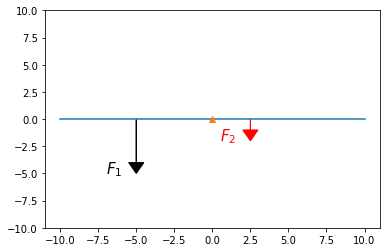

In [ ]:
import matplotlib.pyplot as plt
ax = plt.axes()
plt.plot([-10, 10], [0, 0])
plt.axis([-11, 11, -10, 10])
plt.plot([0], marker = "^")
ax.arrow(-5, 0, 0, -4, head_width = 1, head_length = 1, fc = 'k', ec = 'k')
ax.arrow(2.5, 0, 0, -1, head_width = 1, head_length = 1, fc = 'r', ec = 'r')
plt.text(-7, -5, '$F_1$', fontsize = 15)
plt.text(0.5, -2, '$F_2$', {'color': 'red', 'fontsize':15})
plt.show()

#  41. Projectiles

Plot the trajectory of a ball thrown from the top of a cliff. The ball is thrown from the top of a cliff of height $10$ metres with velocity $\underline{u}=20\sqrt{3}\underline{i}+20\underline{j} \, ms^{-1}$. Use the equation:

$\underline{s}=\underline{u}t+\frac{1}{2}\underline{a}t^2$.

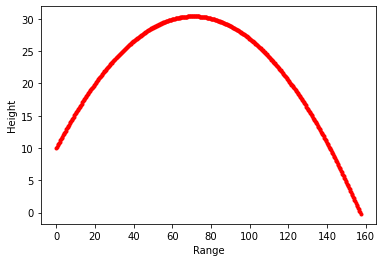

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x0, y0, sy, g, dt, t = 0, 10, 0, 9.8, 0.01, 0
vx0 = 20 * np.sqrt(3)
vy0 = 20
while sy >= 0:
    sx = vx0 * t
    sy = vy0 * t - g * t**2 / 2 + y0
    t = t + dt
    plt.plot(sx, sy, 'r.')
plt.xlabel('Range')
plt.ylabel('Height')
plt.show()

# 42. Friction

Determine the acceleration of the particle up the slope, given that the coefficient of friction, $\mu$ say, is $\mu=\frac{1}{4}$.

![](Friction_diagram.png)

In [ ]:
import numpy as np
# Resolve forces normal to slope.
R = 25 * 9.8 * np.cos(np.radians(25)) - 300 * np.sin(np.radians(15))
print("R =", R, "N")
# Since particle is moving.
F = (1 / 4) * R
print("F =", F, "N")
# Resolve forces parallel to slope.
a_num = 300 * np.cos(np.radians(15)) - F - 25 * 9.8 * np.sin(np.radians(25))
a = a_num / 25
print('a =', a, 'm/s/s.')

R = 144.39969429322304 N
F = 36.09992357330576 N
a = 6.005454007477733 m/s/s.


![](BeyondALevel.png)

Springer: http://www.springer.com/us/book/9783319781440

Jupyter Notebook: http://www.doc.mmu.ac.uk/STAFF/S.Lynch/DSAP_Jupyter_Notebook.html

GitHub Files: https://github.com/springer-math/dynamical-systems-with-applications-using-python

# THE END!

<footer> <small>&copy; Copyright 2019-2021, Dr Stephen Lynch FIMA SFHEA</small></footer>